In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
loan_df=pd.read_csv("loan_data.csv")

In [5]:
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [7]:
loan_df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [9]:
loan_df.duplicated().sum()

0

In [13]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
enc=LabelEncoder()

In [19]:
loan_df['person_gender']=enc.fit_transform(loan_df['person_gender'])

In [23]:
loan_df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [35]:
from sklearn.preprocessing import OrdinalEncoder
edu=['High School','Bachelor','Master','Associate','Doctorate']
ord=OrdinalEncoder(categories=[edu])

In [39]:
loan_df['person_education']=ord.fit_transform(loan_df[['person_education']])

In [60]:
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22.0,0,2.0,71948.0,0,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,False,False,False,True
1,21.0,0,0.0,12282.0,0,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,False,False,True,False
2,25.0,0,0.0,12438.0,3,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,True,False,False,False
3,23.0,0,1.0,79753.0,0,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,False,False,False,True
4,24.0,1,2.0,66135.0,1,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,False,False,False,True


In [62]:
loan_df['person_home_ownership_MORTGAGE']=enc.fit_transform(loan_df['person_home_ownership_MORTGAGE'])
loan_df['person_home_ownership_OTHER']=enc.fit_transform(loan_df['person_home_ownership_OTHER'])
loan_df['person_home_ownership_OWN']=enc.fit_transform(loan_df['person_home_ownership_OWN'])
loan_df['person_home_ownership_RENT']=enc.fit_transform(loan_df['person_home_ownership_RENT'])

In [66]:
loan_df['previous_loan_defaults_on_file']=enc.fit_transform(loan_df['previous_loan_defaults_on_file'])

In [70]:
loan_df['loan_intent']=enc.fit_transform(loan_df['loan_intent'])

In [72]:
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22.0,0,2.0,71948.0,0,35000.0,4,16.02,0.49,3.0,561,0,1,0,0,0,1
1,21.0,0,0.0,12282.0,0,1000.0,1,11.14,0.08,2.0,504,1,0,0,0,1,0
2,25.0,0,0.0,12438.0,3,5500.0,3,12.87,0.44,3.0,635,0,1,1,0,0,0
3,23.0,0,1.0,79753.0,0,35000.0,3,15.23,0.44,2.0,675,0,1,0,0,0,1
4,24.0,1,2.0,66135.0,1,35000.0,3,14.27,0.53,4.0,586,0,1,0,0,0,1


In [74]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int32  
 2   person_education                45000 non-null  float64
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   loan_amnt                       45000 non-null  float64
 6   loan_intent                     45000 non-null  int32  
 7   loan_int_rate                   45000 non-null  float64
 8   loan_percent_income             45000 non-null  float64
 9   cb_person_cred_hist_length      45000 non-null  float64
 10  credit_score                    45000 non-null  int64  
 11  previous_loan_defaults_on_file  45000 non-null  int32  
 12  loan_status                     

In [78]:
x=loan_df.drop(columns=['loan_status'],axis=1)
y=loan_df['loan_status']

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
xtrain.shape,ytrain.shape

((36000, 16), (36000,))

In [86]:
from sklearn.linear_model import LogisticRegression

In [98]:
model=LogisticRegression()

In [100]:
model.fit(xtrain,ytrain)

C:\Users\giridharanks\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
ypred=model.predict(xtest)

In [104]:
from sklearn import metrics

In [108]:
cm=metrics.confusion_matrix(ytest,ypred)

In [110]:
cm

array([[6709,  281],
       [1309,  701]], dtype=int64)

In [112]:
acc=metrics.accuracy_score(ytest,ypred)

In [120]:
print("Accurracy:",acc*100,"%")

Accurracy: 82.33333333333334 %


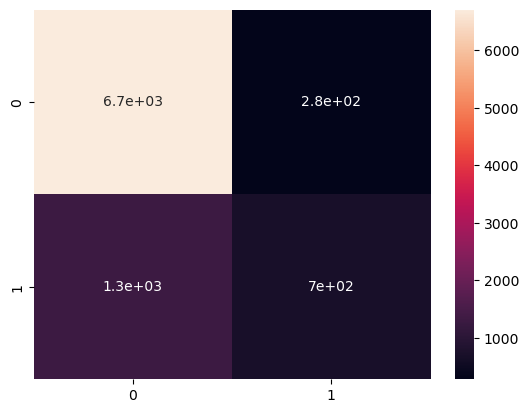

In [122]:
sns.heatmap(data=cm,annot=True)
plt.show()